In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server
anvil.server.connect("Your server link here")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


### Loading Libraries | Mounting our Model

In [ ]:
from fastai.vision import *
from fastai.vision.interpret import *
from fastai.callbacks.hooks import *
from pathlib import Path
from fastai.utils.mem import *
torch.backends.cudnn.benchmark=True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Exporting the Model

In [ ]:
path = Path('gdrive/My Drive/Semantic_Segmentation/model')

def acc_rtk(*_): pass
model = load_learner(path)

### Importing Images

In [ ]:
from google.colab import files
uploaded = files.upload()
image = next(iter(uploaded))

Saving 000000529.png to 000000529.png


In [ ]:
img = open_image('/content/' + image)
color_map = model.predict(img)

(ImageSegment (1, 288, 352), None)

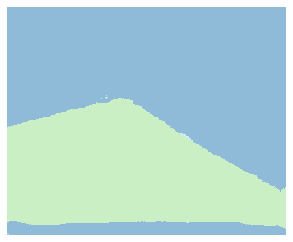

In [ ]:
color_map[0] , color_map[0].show(figsize=(5,5))

In [ ]:
import anvil.media

@anvil.server.callable
def segment_image(file):
  with anvil.media.TempFile(file) as f:
    img = open_image(f)
  seg = model.predict(img)
  return img